In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import json
import sys
from typing import List
from collections import namedtuple
from tqdm import tqdm

In [7]:
paths = ['../mmd', '../shared']

for p in paths:
    if p not in sys.path:
        sys.path.append(p)
        
from Argument import Argument
from DataHandler import DataHandler
from FeaturedArgument import FeaturedArgument
from myutils import cosine_similarity

## Wiki controversial topics

In [6]:
clr_train_set = pickle.load(open(r"C:\Users\Jonas\git\thesis\not-gitted\argsme-crawled\1629700068.9873986-4566-arguments-cleaned.pickle", 'rb'))

In [8]:
clr_train_data = DataHandler(clr_train_set)

In [12]:
len(clr_train_data.get_arguments())

4566

In [16]:
len(clr_train_data.get_filtered_arguments([DataHandler.get_args_filter_length(3)]))

4566

In [11]:
context_keys = DataHandler.get_query_context_keys(clr_train_data.get_arguments())
len(context_keys)

646

In [21]:
contexts = dict()
for k in context_keys:
    contexts[k] = DataHandler.get_query_context(clr_train_data.get_arguments(), k)

In [28]:
context_sizes = np.array([len(v) for v in contexts.values()])

In [30]:
context_sizes.mean()

7.068111455108359

In [31]:
context_sizes.std()

2.456117369440923

In [33]:
np.median(context_sizes)

8.0

C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


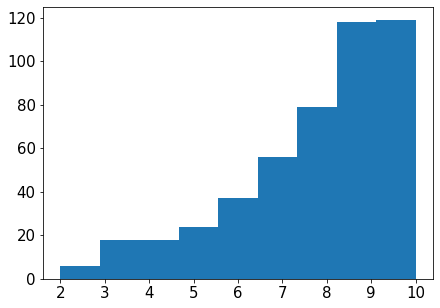

In [89]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(context_sizes, bins=9)
ax.set_xticklabels(range(1,11,1), size=15)
ax.set_yticklabels(range(0,140,20), size=15)
plt.show()

In [104]:
# mean arg length
arg_lengths = np.array([len(a.sentences) for a in clr_train_set])
arg_lengths.shape

(4566,)

In [105]:
arg_lengths.mean()

18.471747700394218

In [106]:
arg_lengths.std()

18.062976023208726

In [107]:
arg_lengths.min()

3

In [108]:
arg_lengths.max()

152

In [109]:
np.median(arg_lengths)

11.0

C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


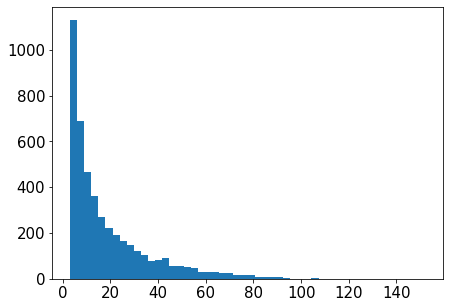

In [125]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist([len(a.sentences) for a in clr_train_set], bins=50)
ax.set_xticklabels(range(-20,180,20), size=15)
ax.set_yticklabels(range(0,1200,200), size=15)
plt.show()

## Query based

In [41]:
qb_train_set = pickle.load(open(r"C:\Users\Jonas\git\thesis\not-gitted\argsme-crawled\1632239915.4824035-3756-arguments-cleaned-test.pickle", 'rb'))

In [42]:
qb_train_data = DataHandler(qb_train_set)

In [43]:
len(qb_train_data.get_arguments())

3756

In [44]:
len(qb_train_data.get_filtered_arguments([DataHandler.get_args_filter_length(3)]))

3756

In [45]:
context_keys = DataHandler.get_query_context_keys(qb_train_data.get_arguments())
len(context_keys)

475

In [51]:
contexts = dict()
for k in context_keys:
    contexts[k] = DataHandler.get_query_context(qb_train_data.get_arguments(), k)

In [52]:
context_sizes = np.array([len(v) for v in contexts.values()])

In [53]:
context_sizes.mean()

7.907368421052632

In [54]:
context_sizes.std()

2.033365998859664

In [55]:
np.median(context_sizes)

8.0

C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


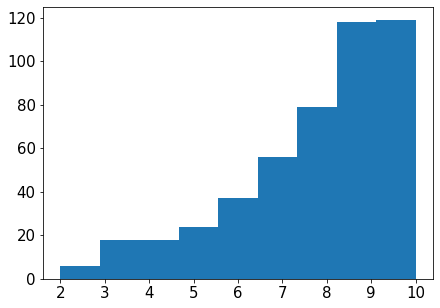

In [92]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(context_sizes, bins=9)
ax.set_xticklabels(range(1,11,1), size=15)
ax.set_yticklabels(range(0,140,20), size=15)
plt.show()

In [112]:
# mean arg length
arg_lengths = np.array([len(a.sentences) for a in qb_train_set])
arg_lengths.shape

(3756,)

In [113]:
arg_lengths.mean()

20.945686900958467

In [114]:
arg_lengths.min()

3

In [115]:
arg_lengths.max()

158

In [116]:
np.median(arg_lengths)

13.0

C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


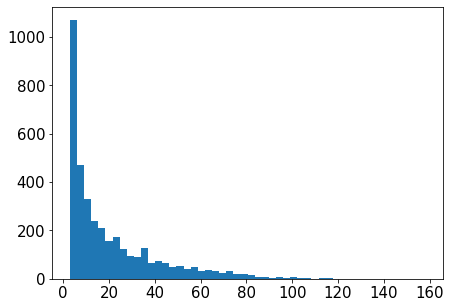

In [123]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist([len(a.sentences) for a in qb_train_set], bins=50)
ax.set_xticklabels(range(-20,180,20), size=15)
ax.set_yticklabels(range(0,1200,200), size=15)
plt.show()